### Analysis of SpaceX Missions, 2006 to Present (2017)

The Purpose of this notebook is to analyze trends and insights from SpaceX's Missions data, from 2006 to 2017


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import SpaceX Missions dataset
SpaceX=pd.read_csv('Random Datasets\SpaceX_Missions_2016_to_present.csv')

In [3]:
#Overview of Dataset, with the top 5 rows
SpaceX.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


In [4]:
#Descriptive Summary of Dataset - columns, datatypes, # of entries
SpaceX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      41 non-null     object 
 1   Launch Date        41 non-null     object 
 2   Launch Time        41 non-null     object 
 3   Launch Site        41 non-null     object 
 4   Vehicle Type       41 non-null     object 
 5   Payload Name       41 non-null     object 
 6   Payload Type       38 non-null     object 
 7   Payload Mass (kg)  33 non-null     float64
 8   Payload Orbit      36 non-null     object 
 9   Customer Name      39 non-null     object 
 10  Customer Type      39 non-null     object 
 11  Customer Country   39 non-null     object 
 12  Mission Outcome    41 non-null     object 
 13  Failure Reason     8 non-null      object 
 14  Landing Type       28 non-null     object 
 15  Landing Outcome    21 non-null     object 
dtypes: float64(1), object(15)
me

In [5]:
SpaceX["Launch Date"].head()

0    24 March 2006
1    21 March 2007
2    3 August 2008
3    3 August 2008
4    3 August 2008
Name: Launch Date, dtype: object

In [6]:
#Create Launch Year Column from the Years recorded in "Launch Date" (the last 4 digits)

SpaceX["Launch Year"]=SpaceX["Launch Date"].str[-4:].astype(int)
SpaceX

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome,Launch Year
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN,2006
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN,2007
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN,2008
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN,2008
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN,2008
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,RatSat (DemoSat),NaN,165.0,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,NaN,NaN,2008
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.0,Low Earth Orbit,ATSB,Government,Malaysia,Success,NaN,NaN,NaN,2009
7,F9-1,4 June 2010,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,Parachute,Failure,2010
8,F9-2,8 December 2010,15:43,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C1),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,Parachute,Failure,2010
9,F9-3,22 May 2012,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C2+),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN,2012


## Questions for Analysis

### Overall

What is SpaceX's overall success rate?

### Success

What are SpaceX's most common Payload Types?  
What are SpaceX's main customers?    
Has SpaceX's success rate improved over time?  


### Failures

What were the most common causes of mission failure?  
Mission Failures categorized by Vehicle Types  

#### What is SpaceX's Overall Success rate?

In [7]:
#Total number of Missions 
total_missions= len(SpaceX["Mission Outcome"]) #this column has a zero null count

mission_success=len(SpaceX[SpaceX["Mission Outcome"]=="Success"])

success_rate=round((mission_success/total_missions)*100,2)

success_rate_df=pd.DataFrame({"Total Missions":[total_missions],"Succesful Missions":[mission_success],
                              "Success Rate (%)":[success_rate]})

success_rate_df

,Total Missions,Succesful Missions,Success Rate (%)
0,41,33,80.49


#### What are Space X's most common Payload Types?

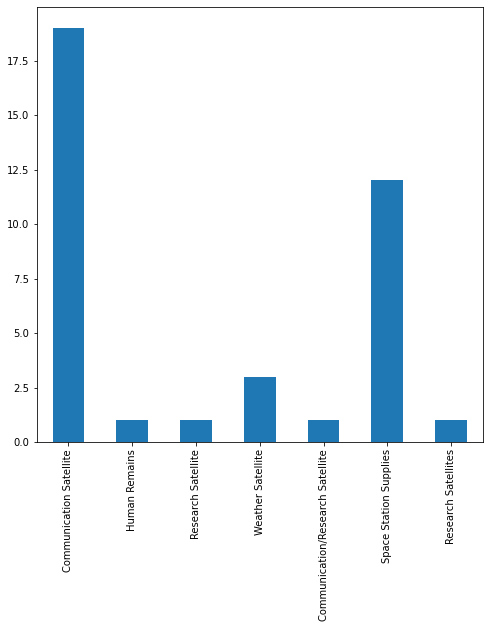

In [8]:
#Plot the count of each "Payload Type" label as a bar graph
SpaceX["Payload Type"].value_counts(sort=False).plot.bar(figsize=(8,8));

#### Who are Space X's main customers?

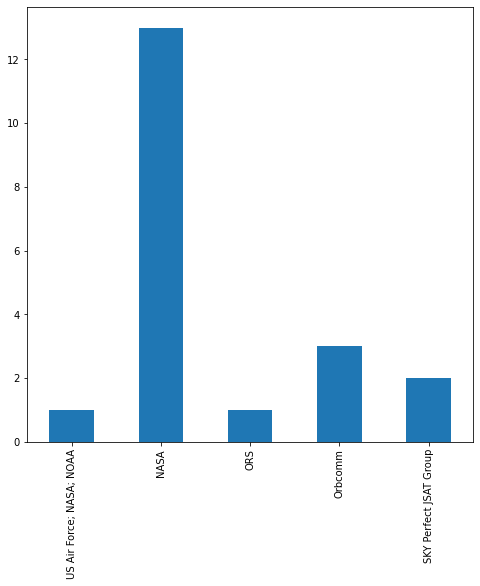

In [9]:
#Top 5 SpaceX customers
top_5_customers= SpaceX["Customer Name"].value_counts(sort=False).head()

#plot bar graph
top_5_customers.plot.bar(figsize=(8,8));



By far, their main customer is NASA

#### Has SpaceX's success rate improved over time?

In [10]:
#Group the count of successes and failures by Year

mission_outcome_table = pd.crosstab(SpaceX["Mission Outcome"], SpaceX["Launch Year"])
mission_outcome_table

Launch Year,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017
Mission Outcome,,,,,,,,,,,
Failure,1,1,3,0,0,1,0,0,1,1,0
Success,0,0,1,1,2,2,3,6,7,9,2


In [11]:
#change data type of dframe to int
mission_outcome_table=mission_outcome_table.astype(int)

In [12]:
#Calculate Success Rate and add as new row
mission_outcome_table.loc["Success Rate %"] = (mission_outcome_table.loc["Success"]/mission_outcome_table.sum())*100
mission_outcome_table

Launch Year,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017
Mission Outcome,,,,,,,,,,,
Failure,1.0,1.0,3.0,0.0,0.0,1.000000,0.0,0.0,1.0,1.0,0.0
Success,0.0,0.0,1.0,1.0,2.0,2.000000,3.0,6.0,7.0,9.0,2.0
Success Rate %,0.0,0.0,25.0,100.0,100.0,66.666667,100.0,100.0,87.5,90.0,100.0


In [13]:
#Transpose rows and columns and round to 2 decimal places

mission_outcome_table=mission_outcome_table.T.round(decimals=2)

mission_outcome_table

Mission Outcome,Failure,Success,Success Rate %
Launch Year,,,
2006,1.0,0.0,0.00
2007,1.0,0.0,0.00
2008,3.0,1.0,25.00
2009,0.0,1.0,100.00
2010,0.0,2.0,100.00
2012,1.0,2.0,66.67
2013,0.0,3.0,100.00
2014,0.0,6.0,100.00
2015,1.0,7.0,87.50


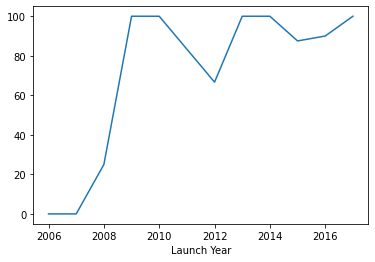

In [14]:
#Plot "Success Rate%" as line graph
mission_outcome_table["Success Rate %"].plot();

In [15]:
#Create "Launch Year" column for more plot customization (harder to customize rows)
mission_outcome_table["Launch Year"]=SpaceX["Launch Year"].unique()
mission_outcome_table

Mission Outcome,Failure,Success,Success Rate %,Launch Year
Launch Year,,,,
2006,1.0,0.0,0.00,2006
2007,1.0,0.0,0.00,2007
2008,3.0,1.0,25.00,2008
2009,0.0,1.0,100.00,2009
2010,0.0,2.0,100.00,2010
2012,1.0,2.0,66.67,2012
2013,0.0,3.0,100.00,2013
2014,0.0,6.0,100.00,2014
2015,1.0,7.0,87.50,2015


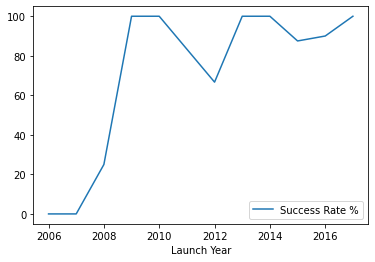

In [17]:
mission_outcome_table.plot(x="Launch Year", y="Success Rate %");

#### What were the most common causes of mission failure?

In [27]:
#Total count of each 'Failure Reason' label
mission_fail_tally=pd.DataFrame(SpaceX["Failure Reason"].value_counts(sort=False))

mission_fail_tally


,Failure Reason
Vehicle Explosion Before Launch,1
Collision During Launch,3
Vehicle Explosion During Flight,1
Engine Failure During Flight,1
Engine Fire During Launch,1
Engine Shutdown During Launch,1


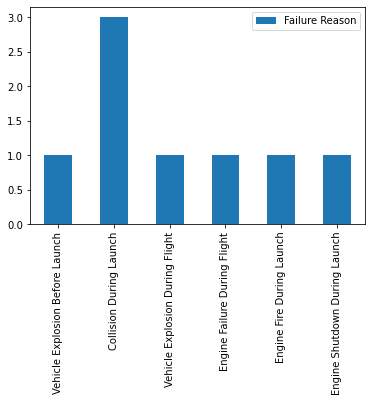

In [29]:
#Bar Plot of 'Failure Reason'
mission_fail_tally.plot.bar();

The most common cause for mission failure was Collission During Launch

#### Mission Failures by Vehicle Type

In [66]:
#List of Mission Failures by Vehicle Type

failure_by_vehicle_type=pd.DataFrame(pd.crosstab(SpaceX["Mission Outcome"],SpaceX["Vehicle Type"]))

failure_by_vehicle_type= failure_by_vehicle_type.T.drop("Success",axis=1)

failure_by_vehicle_type

Mission Outcome,Failure
Vehicle Type,
Falcon 1,5
Falcon 9 (v1.0),1
Falcon 9 (v1.1),1
Falcon 9 Full Thrust (v1.2),1


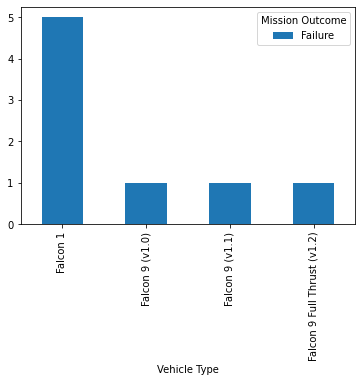

In [67]:
#Bar plot of Mission failures by Vehicle Type

failure_by_vehicle_type.plot.bar()

Majority of Mission Failures were on Falcon 1

#### Bonus: Which years were Falcon 1 rockets used?

In [87]:
#Filter SpaceX table for Falcon 1 rockets only

Falcon_1_only = SpaceX[SpaceX["Vehicle Type"].str.contains("Falcon 1")]

Falcon_1_only

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome,Launch Year
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN,2006
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN,2007
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN,2008
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN,2008
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN,2008
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,RatSat (DemoSat),NaN,165.0,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,NaN,NaN,2008
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.0,Low Earth Orbit,ATSB,Government,Malaysia,Success,NaN,NaN,NaN,2009


In [89]:
#Filter above Falcon 1 table for Vehicle Type and Launch Year columns

Falcon_1_only.filter(items=["Vehicle Type", "Launch Year"])

,Vehicle Type,Launch Year
0,Falcon 1,2006
1,Falcon 1,2007
2,Falcon 1,2008
3,Falcon 1,2008
4,Falcon 1,2008
5,Falcon 1,2008
6,Falcon 1,2009


Falcon 1 Rockets were used from 2006-2009